In [1]:
# Kerakli kutubxonalarni chaqirib olish
import numpy as np                      # Sonli (raqamli) hisob-kitoblar uchun kutubxona
import pandas as pd                    # Jadval ko‘rinishidagi ma'lumotlar bilan ishlash uchun
import matplotlib.pyplot as plt        # Grafik chizish uchun asosiy kutubxona
import seaborn as sns                  # Yaxshi dizayndagi grafiklar chizish uchun kutubxona (matplotlib asosida ishlaydi)
from sklearn.model_selection import train_test_split  # Ma'lumotni o‘quv va test qismlarga ajratish uchun
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Model baholash mezonlari

In [11]:
data = {
    'Kitoblar soni': [100, 200, 300, 400, 500],
    'Tashrif buyuruvchilar': [50, 100, 150, 200, 250]
}

# Ma'lumotni DataFrame ga aylantirish
df = pd.DataFrame(data)
print(df)


   Kitoblar soni  Tashrif buyuruvchilar
0            100                     50
1            200                    100
2            300                    150
3            400                    200
4            500                    250


In [18]:
# Xususiyat va nishonni ajratish
x = df[['Kitoblar soni']]  # Xususiyat (kirish ma'lumotlari)
y = df['Tashrif buyuruvchilar']  # Nishon (chiqish ma'lumotlari)

In [20]:
from sklearn.tree import DecisionTreeRegressor  # Qaror daraxti regressiya modeli
from sklearn.tree import plot_tree              # Daraxtni chizish funksiyasi

In [30]:
# Qaror daraxti regressori modelini yaratish
tree = DecisionTreeRegressor()  # E'tibor: chuqurlik (depth) belgilanmagan, ya'ni daraxt to‘liq o‘sadi

# Modelni o'rgatish
tree.fit(x, y)


DecisionTreeRegressor()

In [38]:
# Bashorat qilish uchun yangi ma'lumot (kitoblar soni)
number_of_new_books = pd.DataFrame({'Kitoblar soni': [35]})

# Birinchi qiymatni chiqarish
number_of_new_books['Kitoblar soni'][0]


35

In [36]:
# Predict the ice cream sales for the new temperature
predicted_sales = tree.predict(number_of_new_books)

In [42]:
print(f"Kitoblar sotuvi {number_of_new_books['Kitoblar soni'][0]} Tashrif_buyuruvchilar {predicted_sales[0]}")


Kitoblar sotuvi 35 Tashrif_buyuruvchilar 50.0


In [48]:
x.columns
# X.columns — bu pandas DataFrame obyektida mavjud bo‘lgan ustun nomlarini ko‘rsatadi. Agar X — bu DataFrame bo‘lsa, unda X.columns yordamida ustunlar ro‘yxatini olishingiz mumkin

Index(['Kitoblar soni'], dtype='object')

In [50]:
df

,Kitoblar soni,Tashrif buyuruvchilar
0,100,50
1,200,100
2,300,150
3,400,200
4,500,250


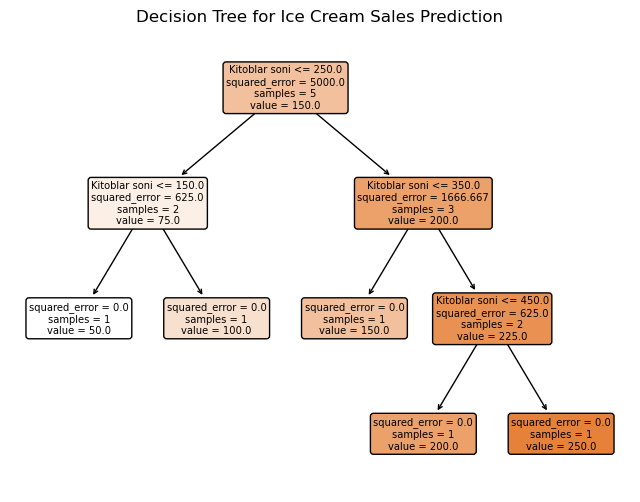

In [56]:
# Qaror daraxtini vizualizatsiya qilish
plt.figure(figsize=(8, 6))  # Grafik o‘lchamini sozlash (qayta o‘qish uchun qulayroq)
plot_tree(tree, feature_names=x.columns, filled=True, rounded=True)
plt.title("Decision Tree for Ice Cream Sales Prediction")  # Grafikka sarlavha qo‘yish
plt.show()  # Grafikni ko‘rsatish

# plt.figure(figsize=(8, 6)) — Grafikning o‘lchamini o‘zgartirish, buning yordamida daraxtni yaxshi ko‘rish mumkin.
# plot_tree(tree, feature_names=X.columns, filled=True, rounded=True) — qaror daraxtini chizadi.
# feature_names=X.columns — bu yerda X ustun nomlarini (masalan, Kitoblar soni) ko‘rsatadi.
# filled=True — daraxtni ranglar bilan to‘ldirish, har bir tugun ma'lumotiga qarab ranglash.
# rounded=True — tugunlarni yumaloq burchakli qilish.
# plt.title() — grafikka sarlavha qo‘shadi.
# Shundan so‘ng, plt.show() yordamida qaror daraxti ko‘rsatiladi.

In [116]:
# Yangi ma'lumotlar to'plami (moshinalar)
data = {
    'Yil': [2015, 2018, 2020, 2017, 2019, 2021, 2016, 2020, 2022, 2019],
    'Model': ['Toyota', 'Honda', 'BMW', 'Audi', 'Ford', 'Tesla', 'Chevrolet', 'Nissan', 'Hyundai', 'Mazda'],
    'Narxi': [15000, 18000, 35000, 30000, 22000, 50000, 18000, 25000, 27000, 24000]
}

# DataFrame ga aylantirish
df = pd.DataFrame(data)

# DataFrame ni ko‘rsatish
print(df)


    Yil      Model  Narxi
0  2015     Toyota  15000
1  2018      Honda  18000
2  2020        BMW  35000
3  2017       Audi  30000
4  2019       Ford  22000
5  2021      Tesla  50000
6  2016  Chevrolet  18000
7  2020     Nissan  25000
8  2022    Hyundai  27000
9  2019      Mazda  24000


In [96]:
df

,Yil,Model,Narxi
0,2015,Toyota,15000
1,2018,Honda,18000
2,2020,BMW,35000
3,2017,Audi,30000
4,2019,Ford,22000
5,2021,Tesla,50000
6,2016,Chevrolet,18000
7,2020,Nissan,25000
8,2022,Hyundai,27000
9,2019,Mazda,24000


In [120]:
# Xususiyatlar va maqsad
X = df[['Yil', 'Model']] # Xususiyatlar (kiritish maʼlumotlari)
y = df['Narxi'] # Maqsadli o'zgaruvchi (chiqish ma'lumotlari)

In [122]:
y

0    15000
1    18000
2    35000
3    30000
4    22000
5    50000
6    18000
7    25000
8    27000
9    24000
Name: Narxi, dtype: int64

In [124]:
X

,Yil,Model
0,2015,Toyota
1,2018,Honda
2,2020,BMW
3,2017,Audi
4,2019,Ford
5,2021,Tesla
6,2016,Chevrolet
7,2020,Nissan
8,2022,Hyundai
9,2019,Mazda


In [128]:
# DecisionTreeRegressor modelini yaratish
tree = DecisionTreeRegressor(max_depth=10)  # Daraxtning maksimal chuqurligini cheklash (overfittingni oldini olish)

# Modelni o'rgatish (training)
tree.fit(X, y)


ValueError: could not convert string to float: 'Toyota'